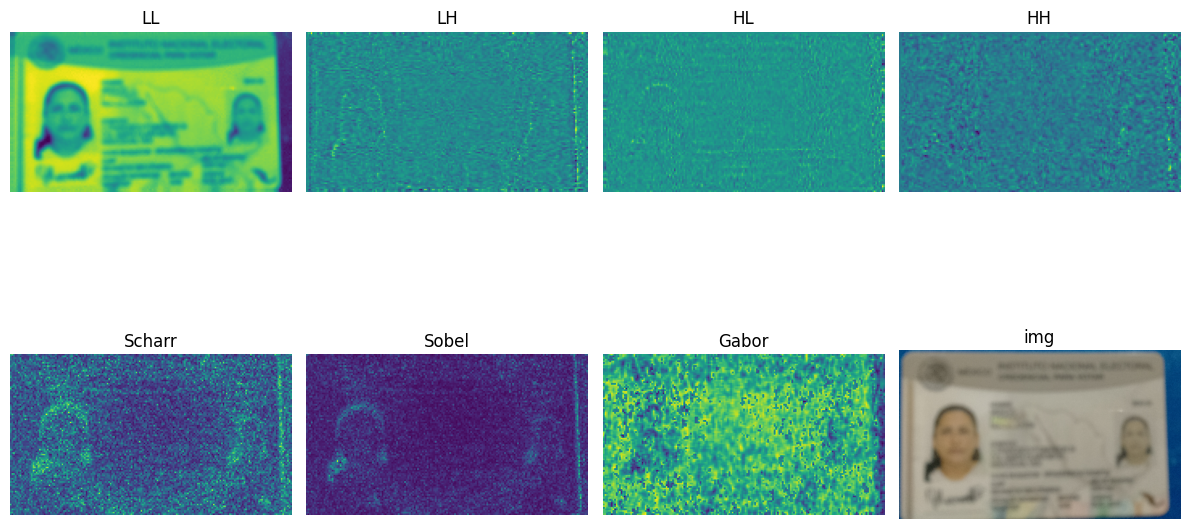

In [8]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from utils import preprocess_img


dataset_path_reales = "/Users/jorgecamero/MoireDataset/batchTrain/Reales"
imgFiles = [file for file in os.listdir(dataset_path_reales) if file.endswith(('.jpg', '.png', '.jpeg'))]
randomImgReales = os.path.join(dataset_path_reales, random.choice(imgFiles))

dataset_path_ataque = "/Users/jorgecamero/MoireDataset/batchTrain/Ataque"
imgFiles = [file for file in os.listdir(dataset_path_ataque) if file.endswith(('.jpg', '.png', '.jpeg'))]
randomImgAtaque = os.path.join(dataset_path_ataque, random.choice(imgFiles))

random_choice = random.choice([randomImgAtaque, randomImgReales])

HEIGHT = 800
WIDTH = 1400

img = cv2.imread(random_choice)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

channels = preprocess_img(img, HEIGHT, WIDTH)

LL = channels['LL_Input']
LH = channels['LH_Input']
HL = channels['HL_Input']
HH = channels['HH_Input']
Scharr = channels['Scharr_Input']
Sobel = channels['Sobel_Input']
Gabor = channels['Gabor_Input']
original = img

channel_list = [LL, LH, HL, HH, Scharr, Sobel, Gabor, img]
titles = ['LL', 'LH', 'HL', 'HH', 'Scharr', 'Sobel', 'Gabor', 'img']

n_channels = len(channel_list)
n_cols = 4
n_rows = (n_channels + n_cols - 1) // n_cols

fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 8))

axs = axs.flat if isinstance(axs, np.ndarray) else [axs]

for i, ax in enumerate(axs):
    if i < n_channels:
        ax.imshow(channel_list[i])
        ax.set_title(titles[i])
        ax.axis('off')
    else:
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

In [27]:
import os
import cv2

path = '/Users/jorgecamero/MoireDataset/batchTrain'
print(os.path.exists(path))

for roots, dirs, files in os.walk(path):
    for file in files:
        if not os.path.isdir(file) and not file.endswith(('.jpg', '.png', '.jpeg')):
            print(file)

True
.DS_Store
.DS_Store
.DS_Store


In [29]:
from utils import get_model, load_img
from test import test_image

model_path = '/Users/jorgecamero/Moire-Fraud-Detection/checkpoint/best_model.keras'
img_path = '/Users/jorgecamero/MoireDataset/batchTrain/Ataque/ine_front.jpg'

model = get_model(loadFlag=True, path=model_path)
img = load_img(img_path)

predict = test_image(model=model, img=img)
print(predict)

ImportError: cannot import name 'get_model' from 'utils' (/Users/jorgecamero/Moire-Fraud-Detection/utils.py)